# Admissão de Aluno
In this notebook, we predict student admissions to graduate school at UCLA based on three pieces of data:
- GRE Scores (Graduate Record Examination)
- GPA Scores (Grade Point Average)
- Class rank (1-4)

In [2]:
# Importing pandas and numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Importando a base de dados

In [4]:
data = pd.read_csv('../data/student_data.csv')
#Mostrando as primeiras 5 linhas da tabela
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


## Gráfico de dispersão

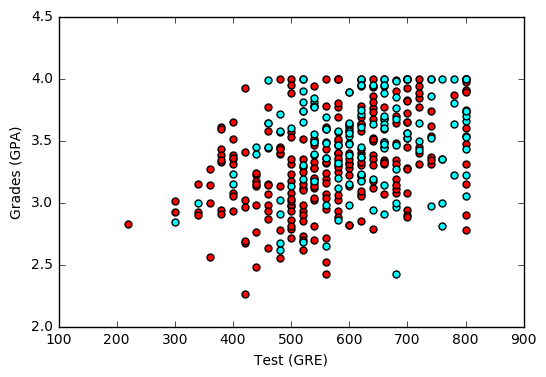

In [5]:
def plot_points(data):
    X = np.array(data[["gre","gpa"]])
    y = np.array(data["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('Test (GRE)')
    plt.ylabel('Grades (GPA)')
    
plot_points(data)

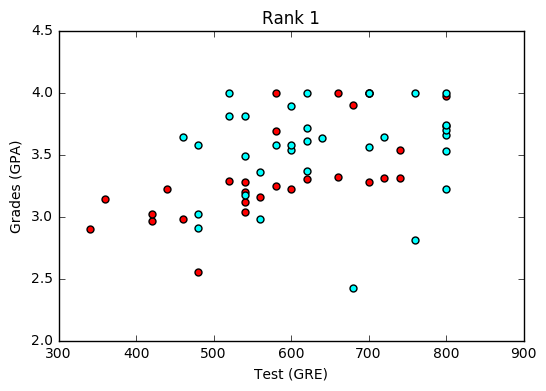

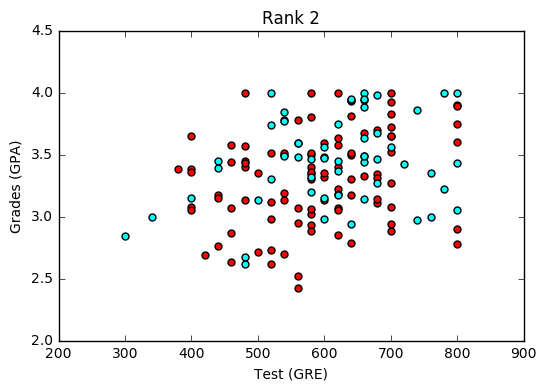

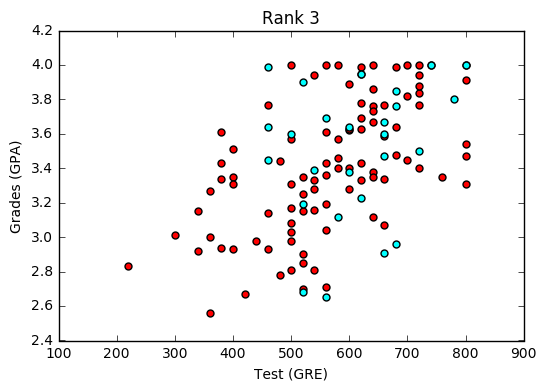

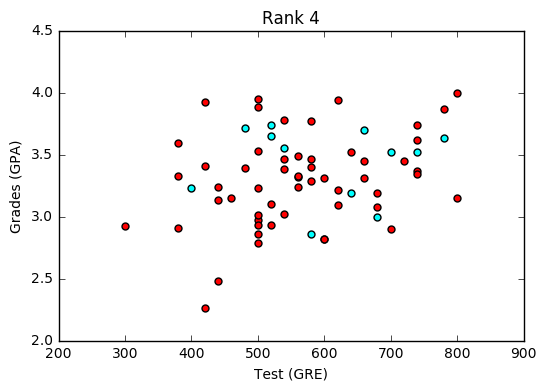

In [8]:
for i in range(1,5):
    plot_points(data.query("rank == {}".format(i)))
    plt.title("Rank {}".format(i))
    plt.show()

## Aplicando one-hot no rank (criação de variável dummy)

In [10]:
one_hot_data = pd.concat([data, pd.get_dummies(data['rank'], prefix='rank')], axis=1)

one_hot_data = one_hot_data.drop('rank', axis=1)

one_hot_data.head(10)

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0.0,0.0,1.0,0.0
1,1,660,3.67,0.0,0.0,1.0,0.0
2,1,800,4.00,1.0,0.0,0.0,0.0
3,1,640,3.19,0.0,0.0,0.0,1.0
4,0,520,2.93,0.0,0.0,0.0,1.0
5,1,760,3.00,0.0,1.0,0.0,0.0
6,1,560,2.98,1.0,0.0,0.0,0.0
7,0,400,3.08,0.0,1.0,0.0,0.0
8,1,540,3.39,0.0,0.0,1.0,0.0
9,0,700,3.92,0.0,1.0,0.0,0.0


## TODO: Scaling the data
The next step is to scale the data. We notice that the range for grades is 1.0-4.0, whereas the range for test scores is roughly 200-800, which is much larger. This means our data is skewed, and that makes it hard for a neural network to handle. Let's fit our two features into a range of 0-1, by dividing the grades by 4.0, and the test score by 800.

In [12]:
processed_data = one_hot_data[:]
max_gre = processed_data["gre"].max()
max_gpa = processed_data["gpa"].max() 
print("Máximo gpa: {} / Máximo gre: {}".format(max_gpa, max_gre))

Máximo gpa: 4.0 / Máximo gre: 800


In [13]:
processed_data['gre'] = processed_data['gre']/max_gre
processed_data['gpa'] = processed_data['gpa']/max_gpa
processed_data.head(10)

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,0.475,0.9025,0.0,0.0,1.0,0.0
1,1,0.825,0.9175,0.0,0.0,1.0,0.0
2,1,1.000,1.0000,1.0,0.0,0.0,0.0
3,1,0.800,0.7975,0.0,0.0,0.0,1.0
4,0,0.650,0.7325,0.0,0.0,0.0,1.0
5,1,0.950,0.7500,0.0,1.0,0.0,0.0
6,1,0.700,0.7450,1.0,0.0,0.0,0.0
7,0,0.500,0.7700,0.0,1.0,0.0,0.0
8,1,0.675,0.8475,0.0,0.0,1.0,0.0
9,0,0.875,0.9800,0.0,1.0,0.0,0.0


## Treino e Teste

In [14]:
sample = np.random.choice(processed_data.index, size=int(len(processed_data)*0.9), replace=False)

train_data, test_data = processed_data.iloc[sample], processed_data.drop(sample)

print("Treino #:", len(train_data))
print("Teste #:", len(test_data))
print(train_data.shape)
print(test_data.shape)

Treino #: 360
Teste #: 40
(360, 7)
(40, 7)


## Features e Labels

In [15]:
features = train_data.drop('admit', axis=1)
targets = train_data['admit']
features_test = test_data.drop('admit', axis=1)
targets_test = test_data['admit']

print(features.shape)
print(targets.shape)

(360, 6)
(360,)


$$ \sigma'(x) = \sigma(x)*(1-\sigma(x))$$
$$ \tanh'(x) = 1 - tanh^2(x)$$


In [364]:
class Activation():
    def __init__(self):
        pass
    
    def f_activ_sig(self, x):
        #TODO
        pass

    def f_activ_sig_prime(self, x):
        #TODO
        pass
    
    def f_activ_relu(self, x):
        #TODO
        pass
    
    def f_activ_relu_prime(self, x):
        #TODO
        pass
    
    def f_ident(self, x):
        #TODO
        pass
    
    def f_ident_prime(self, x):
        #TODO
        pass
    
    def f_tanh(self, x):
        #TODO
        pass
    
    def f_tanh_prime(self, x):
        #TODO
        pass

    def softmax(self, x):
        if x.ndim != 1:
            return np.exp(x) / np.sum(np.exp(x), axis = 1)[:, None]
        else:
            return np.exp(x) / np.sum(np.exp(x), axis = 0)
    
    def softmax_prime(self, x):
        s = self.softmax(x).reshape(-1,1)
        return np.diag(np.diagflat(s) - np.dot(s, s.T))
    
class Layer():
    def __init__(self, neurons, type_, activation="relu"):
        activ = Activation()
        self.neurons = neurons
        self.type_ = type_
        self.activation_name = activation
        
        if type_ == "input":
            self.activation = activ.f_ident
            self.activation_prime = activ.f_ident_prime
            self.activation_name = "ident"
        elif activation == "relu":
            self.activation = activ.f_activ_relu
            self.activation_prime = activ.f_activ_relu_prime
        elif activation == "tanh":
            self.activation = activ.f_tanh
            self.activation_prime = activ.f_tanh_prime
        elif activation == "ident":
            self.activation = activ.f_ident
            self.activation_prime = activ.f_ident_prime   
        elif activation == "softmax":
            self.activation = activ.softmax
            self.activation_prime = activ.softmax_prime               
        else:
            self.activation = activ.f_activ_sig
            self.activation_prime = activ.f_activ_sig_prime

In [365]:
class MLP():
    def __init__(self, layers):
        self.layers = {k: item for k, item in enumerate(layers)}
        
        self.weights = dict()
        self.biases = dict()       
        
        init_ = 0
        end_ = len(self.layers)
        
        for i, k in zip(range(0,end_-1), range(init_+1, end_)):
            #TODO - Inicializar a matriz de pesos para cada camada
            #Inicialize com um distribuição noraml de média zero e variância igual ao número de linhas
            #da matriz elevado a -0.5
            
            self.weights[k] = None
            
            #TODO - Inicialize o Bias com zero
            self.biases[k] = None
    
    def summary(self):
        for k, layer in self.layers.items():
            print("Layer {} - {} com {} neurônios e funcão de ativação {}".format(layer.type_,
                                                                                  k, layer.neurons, layer.activation_name))
            
        for k, weight in self.weights.items():
            print("Shape matriz {} = {} / Shape bias {} = {}". format(k, weight.shape, k, self.biases[k].shape))
            
    def forward(self, x):
        input_ = x
        
        hidden = dict()
        primes = dict()
        
        init_ = 0
        end_ = len(self.layers)
        
        for i, k in zip(range(0,end_-1), range(init_+1, end_)):
            #TODO - Construa o foward
            
        return hidden, primes
    
    def init_steps(self):
        steps = dict()
        biases_steps=dict()
        for k in range(1, len(self.layers), 1):
            #TODO - Inicialize os passos com zero
            #Você precisará acessa a dimensão das matrizes de peso
                    
        return steps, biases_steps
    
    def train(self, X, Y, batch, epochs=1000, learnrate=0.5):
        last_loss = None
        for e in range(epochs):
            steps, biases_steps = self.init_steps()
            for x, y in zip(X, Y):
                hidden, primes = self.forward(x)
                
                error_term = dict()
                                
                init_ = len(self.layers) - 1 
                end_ = 0
                
                for k in range(init_, 0, -1):
                    #TODO - BackProp
                    
            for k in range(1, len(self.layers), 1):
                #TODO - Atualização dos pesos
            
            if e % (epochs / 10) == 0:
                input_ = X
                for k in range(1, len(self.layers), 1):
                    output_ = self.layers[k].activation(np.dot(input_, self.weights[k]) + self.biases[k])
                    input_ = output_

                loss_f = np.mean((output_ - Y) ** 2)
                
                
                if last_loss and last_loss < loss_f:
                    print("Train loss: ", loss_f, "  WARNING - Loss Increasing")
                else:
                    print("Train loss: ", loss_f)
                last_loss = loss_f

    def predict(self, X):
        #TODO - Construa um função para escorar a base
        pass
        
    def acc(self, X, Y, threshold):
        #TODO - Calcular a acurácia
        pass
      
    def show_acc(self, X, Y, threshold=0.5): 
        print("Prediction accuracy Train: {:.3f}".format(self.acc(X, Y, threshold)))

In [366]:
list_layers = list()
list_layers.append(Layer(6, "input"))
list_layers.append(Layer(10, "hidden", "tanh"))
list_layers.append(Layer(10, "hidden", "relu"))
list_layers.append(Layer(2, "output", "softmax"))
model = MLP(list_layers)

In [369]:
new_target = np.c_[targets.values, np.ones(len(targets.values))]
new_target[:,1] = new_target[:,1] - new_target[:,0]
new_target[0:5]

array([[ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.]])

In [370]:
model.summary()

Layer input - 0 com 6 neurônios e funcão de ativação ident
Layer hidden - 1 com 10 neurônios e funcão de ativação tanh
Layer hidden - 2 com 10 neurônios e funcão de ativação relu
Layer output - 3 com 2 neurônios e funcão de ativação softmax
Shape matriz 1 = (6, 10) / Shape bias 1 = (10,)
Shape matriz 2 = (10, 10) / Shape bias 2 = (10,)
Shape matriz 3 = (10, 2) / Shape bias 3 = (2,)


In [371]:
model.train(features.values, new_target, 10, epochs=1000, learnrate=0.4)

Train loss:  0.251763599503
Train loss:  0.208900500589
Train loss:  0.206094477187
Train loss:  0.203838727938
Train loss:  0.202210949898
Train loss:  0.200888456631
Train loss:  0.199976571985
Train loss:  0.199312255048
Train loss:  0.198727613445
Train loss:  0.198194831286


In [372]:
model.show_acc(features.values, new_target)

Prediction accuracy Train: 0.708


In [375]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc
y_score = model.predict(features.values)
y_test = new_target
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

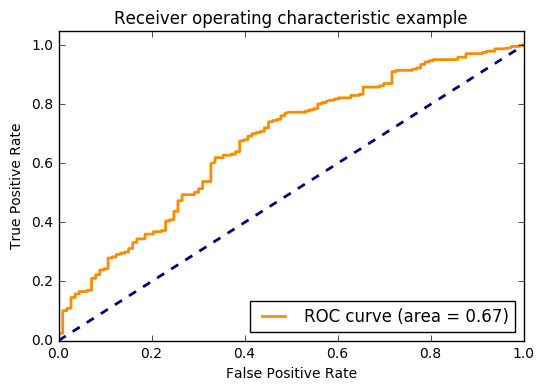

In [381]:
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

Average precision score, micro-averaged over all classes: 0.75


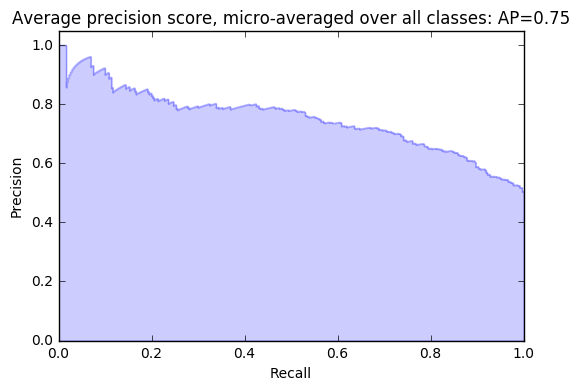

In [386]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.utils.fixes import signature
# For each class
precision = dict()
recall = dict()
average_precision = dict()
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

for i in range(2):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))